<h1 style="font-size:30px;">Depth Map from Stereo Images</h1> 

Goal: We will learn to create a depth map from stereo images. 

Source: https://docs.opencv.org/3.4/dd/d53/tutorial_py_depthmap.html

## <font style="color:rgb(50,120,229)">Basics</font>

In the last session, we saw basic concepts like epipolar constraints and other related terms. We also saw that if we have two images of same scene, we can get depth information from that in an intuitive way. Below is an image and some simple mathematical formulas which prove that intuition. (Image Courtesy :

<br>
<center>
<img src="./images/stereo_depth.jpg" alt="">
</center>
<br>

The above diagram contains equivalent triangles. Writing their equivalent equations will yield us following result:

<br>
<center>
<img src="./images/formula.png" alt="">
</center>
<br>

x and x′ are the distance between points in image plane corresponding to the scene point 3D and their camera center. B is the distance between two cameras (which we know) and f is the focal length of camera (already known). So in short, the above equation says that the depth of a point in a scene is inversely proportional to the difference in distance of corresponding image points and their camera centers. So with this information, we can derive the depth of all pixels in an image.

So it finds corresponding matches between two images. We have already seen how epiline constraint make this operation faster and accurate. Once it finds matches, it finds the disparity. Let's see how we can do it with OpenCV.


# Code
Below code snippet shows a simple procedure to create a disparity map.

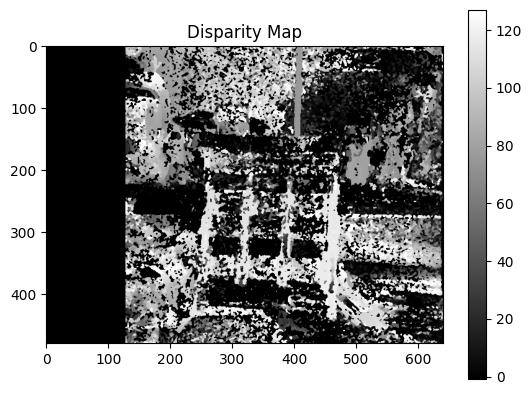

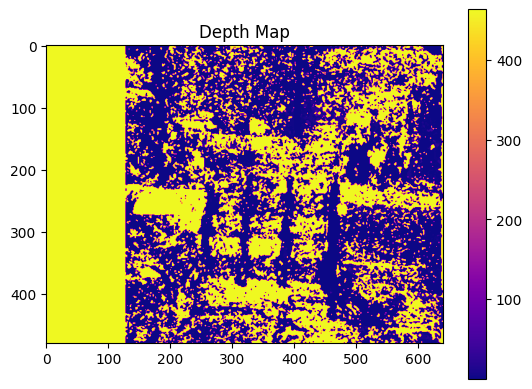

In [26]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load grayscale stereo images
imgL = cv.imread('snapshot_left_PA_book.jpg', cv.IMREAD_GRAYSCALE)
imgR = cv.imread('snapshot_right_PA_book.jpg', cv.IMREAD_GRAYSCALE)

# Create stereo matcher
stereo = cv.StereoSGBM_create(numDisparities=128, blockSize=5)

# Compute disparity and convert to float
disparity = stereo.compute(imgL, imgR).astype(np.float32) / 16.0

# Display disparity map
plt.imshow(disparity, 'gray')
plt.title('Disparity Map')
plt.colorbar()
plt.show()

# Camera parameters from calibration
focal_length = 578.6  # in pixels
baseline = 0.08      # in meters

# Avoid division by zero
disparity[disparity <= 0] = 0.1

# Compute depth map
depth_map = (focal_length * baseline) / disparity

# Display depth map
plt.imshow(depth_map, cmap='plasma')
plt.colorbar()
plt.title('Depth Map')
plt.show()


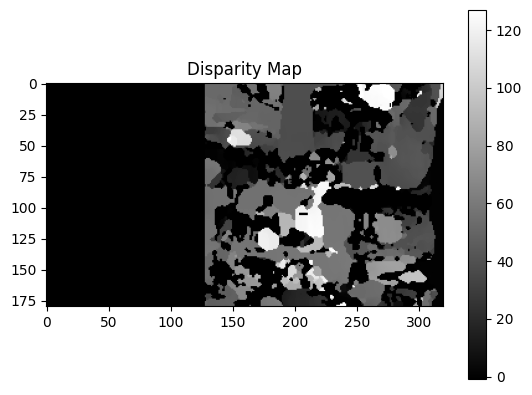

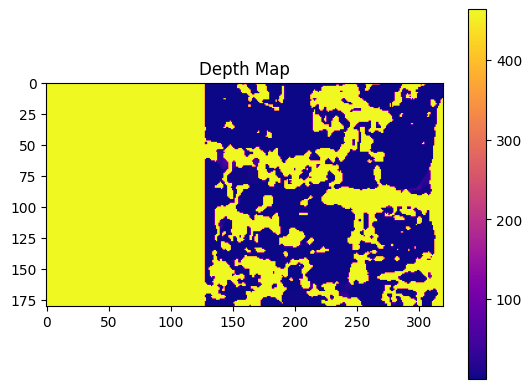

In [28]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load grayscale stereo images
imgL = cv.imread('snapshot_left_PA_book.jpg', cv.IMREAD_GRAYSCALE)
imgR = cv.imread('snapshot_right_PA_book.jpg', cv.IMREAD_GRAYSCALE)

imgL1 = cv.resize(imgL, (320, 180))
imgR1 = cv.resize(imgR, (320, 180))

# === Apply Gaussian Blur to reduce noise ===
imgL1 = cv.GaussianBlur(imgL1, (9, 9), 0)
imgR1 = cv.GaussianBlur(imgR1, (9, 9), 0)
# Create stereo matcher

stereo = cv.StereoSGBM_create(numDisparities=128, blockSize=18)

# Compute disparity and convert to float
disparity = stereo.compute(imgL1, imgR1).astype(np.float32) / 16.0

# Display disparity map
plt.imshow(disparity, 'gray')
plt.title('Disparity Map')
plt.colorbar()
plt.show()

# Camera parameters from calibration
focal_length = 578.6  # in pixels
baseline = 0.08      # in meters

# Avoid division by zero
disparity[disparity <= 0] = 0.1

# Compute depth map
depth_map = (focal_length * baseline) / disparity

# Display depth map
plt.imshow(depth_map, cmap='plasma')
plt.colorbar()
plt.title('Depth Map')
plt.show()


As you can see, the result is contaminated with high degree of noise. By adjusting the values of numDisparities and blockSize, you can get a better result. Besides, there are some parameters when you get familiar with StereoBM, and you may need to fine tune the parameters to get better and smooth results. 

Parameters:
* texture_threshold: filters out areas that don't have enough texture for reliable matching
* Speckle range and size: Block-based matchers often produce "speckles" near the boundaries of objects, where the matching window catches the foreground on one side and the background on the other. In this scene it appears that the matcher is also finding small spurious matches in the projected texture on the table. To get rid of these artifacts we post-process the disparity image with a speckle filter controlled by the speckle_size and speckle_range parameters. speckle_size is the number of pixels below which a disparity blob is dismissed as "speckle." speckle_range controls how close in value disparities must be to be considered part of the same blob.
* Number of disparities: How many pixels to slide the window over. The larger it is, the larger the range of visible depths, but more computation is required.
* min_disparity: the offset from the x-position of the left pixel at which to begin searching.
* uniqueness_ratio: Another post-filtering step. If the best matching disparity is not sufficiently better than every other disparity in the search range, the pixel is filtered out. You can try tweaking this if texture_threshold and the speckle filtering are still letting through spurious matches.
* prefilter_size and prefilter_cap: The pre-filtering phase, which normalizes image brightness and enhances texture in preparation for block matching. Normally you should not need to adjust these.

## Excercise
Use two webcams to form a sterio camera. Take pictures from that camera and estimate the depth map.

In [ ]:
# your code here